Exercise: train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.



In [1]:
from sklearn import datasets

iris=datasets.load_iris()
x=iris["data"][:,(2,3)]
y=iris["target"]

setosa_or_versicolor=(y==0)|(y==1)
x=x[setosa_or_versicolor]
y=y[setosa_or_versicolor]



In [2]:
from sklearn.svm import SVC,LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C=5
alpha=1/(C*len(x))
lin_clf=LinearSVC(loss="hinge",C=C,random_state=42)
svm_clf=SVC(kernel="linear",C=C)
sgd_clf=SGDClassifier(loss="hinge",learning_rate="constant",
                     eta0=0.001,alpha=alpha,n_iter=100000,
                     random_state=42)


#scaler=StandardScaler()
#x_scaled=scaler.fit_transform(x)

lin_clf.fit(x,y)
svm_clf.fit(x,y)
sgd_clf.fit(x,y)

print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), 
      sgd_clf.intercept_, sgd_clf.coef_)



/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


LinearSVC:                    [-3.17393813] [[0.86948985 1.30462163]]
SVC:                          [-3.78823471] [[1.29411744 0.82352928]]
SGDClassifier(alpha=0.00200): [-3.793] [[1.29546361 0.82449706]]


################################################################################

Alternatif bir yaklaşım:
    
    """"
    def plot_svc_decision_boundary(svm_clf, xmin, xmax):
        w = svm_clf.coef_[0]
        b = svm_clf.intercept_[0]

        # At the decision boundary, w0*x0 + w1*x1 + b = 0
        # => x1 = -w0/w1 * x0 - b/w1
        
        x0 = np.linspace(xmin, xmax, 200)
        decision_boundary = -w[0]/w[1] * x0 - b/w[1]

        margin = 1/w[1]
        gutter_up = decision_boundary + margin
        gutter_down = decision_boundary - margin

        svs = svm_clf.support_vectors_
        plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
        plt.plot(x0, decision_boundary, "k-", linewidth=2)
        plt.plot(x0, gutter_up, "k--", linewidth=2)
        plt.plot(x0, gutter_down, "k--", linewidth=2)
        
    """"
###############################################################################    

In [3]:
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0,0]/sgd_clf.coef_[0,1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0,1]

line1=[-10, -10 * w1 + b1], [10, 10 * w1 + b1]
line2=[-10, -10 * w2 + b2],    [10,10*w2+b2]
line3=[-10, -10 * w3+ b3],   [10,10*w3+b3]


In [4]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
lin_clf.fit(x_scaled,y)

w4= -lin_clf.coef_[0,0]/lin_clf.coef_[0,1]
b4= -lin_clf.intercept_[0]/lin_clf.coef_[0,1]



In [5]:
# Transform the decision boundary lines back to the original scale
line4=[-10,-10*w4+b4],[10,10*w4+b4]
line4=scaler.inverse_transform(line4)
line4=line4[0],line4[1]
line4[0]

array([-11.55103577,   6.05238188])

[0, 5.5, 0, 2]

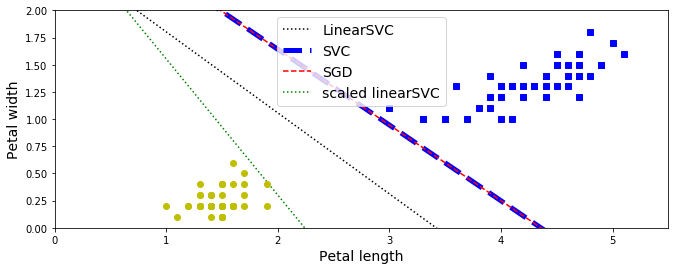

In [7]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(11,4))
plt.plot(line1[ 0], line1[ 1], "k:", label="LinearSVC")
plt.plot(line2[0],line2[1],"b--",linewidth=5,label="SVC")
plt.plot(line3[0],line3[1],"r--",label="SGD")
plt.plot(line4[0],line4[1],"g:",label="scaled linearSVC")
plt.plot(x[:, 0][y==1], x[:, 1][y==1], "bs") # label="Iris-Versicolor"
plt.plot(x[:, 0][y==0], x[:, 1][y==0], "yo") # label="Iris-Setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])
